# Assignment 4：Supervised Learning
### Handwritten Digits Clustering

### Reference link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [26]:
### Load dataset into Python
from sklearn.datasets import load_digits
# loading data
digits = load_digits()
# showing data
digits
# The results below is a Python dictionary which contains all information for this dataset.
# You don't need all of them for this assignment.
# Please see cells below.

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [27]:
### This is the data you need for building and training your clustering models.

digits['data'], digits['data'].shape

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 (1797, 64))

In [28]:
# This is the true labels for all samples.
# You don't need this for building and training your model
# But you can use this to evaluate your clustering results. Recommended but not required.
digits['target'], digits['target'].shape

# k = range(1 , 1798)
# k is 1 - 1797
# Some problems may already have some properties and those properties may help you to select a fixed K, custermer age group, security check(normal or abnormal)
#

(array([0, 1, 2, ..., 8, 9, 8]), (1797,))

<Figure size 640x480 with 0 Axes>

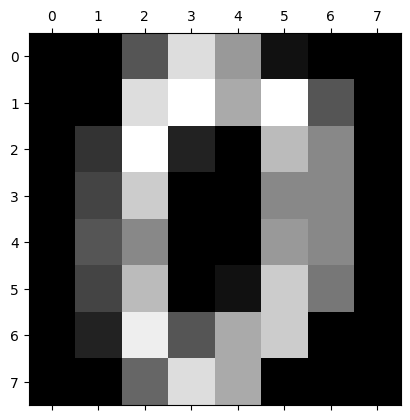

In [29]:
### An example of the handwritten digits in the dataset.
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])

plt.show()

### K Nearest Neighbors Classification

##### Add your KNN model in the cells below.

I would select k=3
Distance Measures: Euclidean distance and Manhhatan distance

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = digits['data']
y = digits['target']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# KNN with Euclidean distance
knn_euclidean = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_euclidean.fit(X_train, y_train)

# Predicting kNN
y_pred_euclidean = knn_euclidean.predict(X_test)

# Evaluating Accuracy of Model
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
print("Accuracy (Euclidean):", accuracy_euclidean)


Accuracy (Euclidean): 0.9833333333333333


In [32]:
# KNN with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_manhattan.fit(X_train, y_train)

# Predicting kNN
y_pred_manhattan = knn_manhattan.predict(X_test)

# Evaluating Accuracy of Model
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
print("Accuracy (Manhattan):", accuracy_manhattan)


Accuracy (Manhattan): 0.9777777777777777


As per results:

*   Accuracy (Euclidean): 0.983
*   Accuracy (Manhattan): 0.977

It shows very good performance from both the models.The model with Euclidean distance has better accuracy when compared to Manhattan. The kNN model is very well suited for digit classification problem



Euclidean distance takes into account diagonal relationships between pixels where as Manhattan distance only considers straight horizontal/vertical steps. The accuracy can change when k is changed.

### Neural Network Classification

##### Add your NN model in the cells below.

For the Neural network classification, I will use:

*   Input Layer: 64
*   Hidden layer: 40
*   Output Layer: 10



In [33]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

X = digits.data
y = digits.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)


In [34]:
# Running the model twice to check random behavior
for run in range(1, 3):
    print(f"\n--- Run {run} ---")
    nn_model = MLPClassifier(hidden_layer_sizes=(40,), activation='relu', max_iter=300, random_state=None)
    nn_model.fit(X_train, y_train)

    # Predicting and evaluating
    y_pred = nn_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy (Hidden layer=40): {acc:.4f}")


--- Run 1 ---
Accuracy (Hidden layer=40): 0.9694

--- Run 2 ---
Accuracy (Hidden layer=40): 0.9806


Accuracy of Neural Network Classification:


*   Run 1: 0.9694
*   Run 2: 0.9806




The accuracy of kNN is better than Neural network classification

There is high degree of randomness for different Neural Network classification runs. It has low reliability when compared to kNN.